In [1]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(16, 6)) 
plt.rc("savefig", dpi=90)
plt.rc("font",family="sans-serif")
plt.rc("font",size=14)

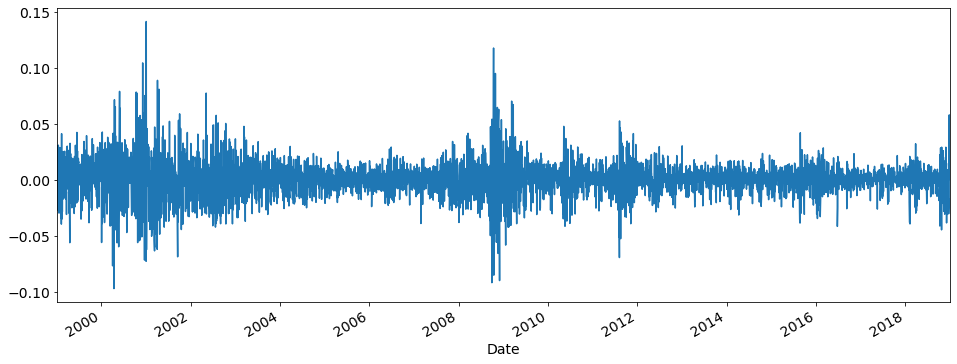

In [2]:
from arch.data import nasdaq

nasdaq_data = nasdaq.load()
nasdaq_returns = nasdaq_data['Adj Close'].pct_change().dropna()

nasdaq_returns.plot()

In [3]:
from arch.univariate import ARX, GARCH, SkewStudent

model = ARX(nasdaq_returns, lags=[1,2,3,4,5,6,7])
model.volatility = GARCH(p=2, q=1)
model.distribution = SkewStudent()

results = model.fit()
print(results.summary())

Iteration:      1,   Func. Count:     16,   Neg. LLF: -14899.659653487042
Iteration:      2,   Func. Count:     42,   Neg. LLF: 31250.603889680955
Iteration:      3,   Func. Count:     61,   Neg. LLF: 24409.154351069308
Iteration:      4,   Func. Count:     78,   Neg. LLF: 15167.075931717645
Iteration:      5,   Func. Count:     95,   Neg. LLF: 12030.563997519366
Iteration:      6,   Func. Count:    117,   Neg. LLF: -3.0015599797676344
Iteration:      7,   Func. Count:    143,   Neg. LLF: 57793.61046592654
Iteration:      8,   Func. Count:    159,   Neg. LLF: 52503.13389640133
Iteration:      9,   Func. Count:    180,   Neg. LLF: 43251.13234822694
Iteration:     10,   Func. Count:    197,   Neg. LLF: 43053.36069748313
Iteration:     11,   Func. Count:    215,   Neg. LLF: 24653.153007409295
Iteration:     12,   Func. Count:    232,   Neg. LLF: 18416.22949366716
Iteration:     13,   Func. Count:    249,   Neg. LLF: 2849.2733561124105
Iteration:     14,   Func. Count:    269,   Neg. LLF: 

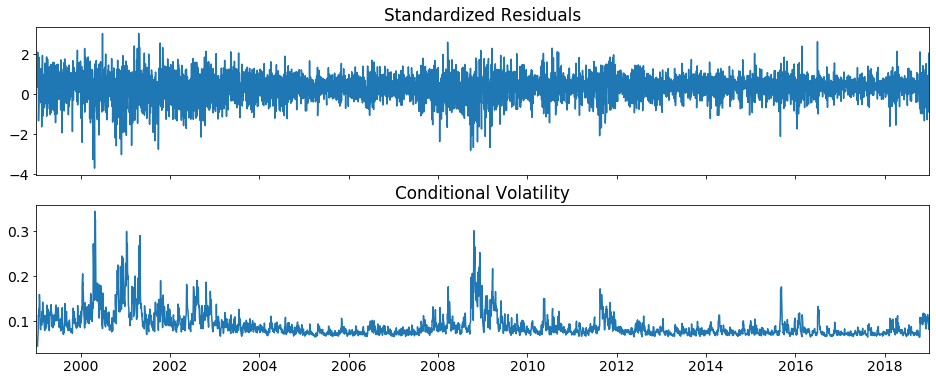

In [4]:
fig = results.plot()

In [5]:
simulated_data = model.simulate(results.params, 1000000)
simulated_data.describe()

,data,volatility,errors
count,1.029000e+03,1000000.000000,1000000.000000
mean,NaN,0.257373,0.000579
std,NaN,0.500204,0.544074
min,-inf,0.064512,-68.352288
25%,-5.549894e+203,0.114321,-0.095240
50%,8.389546e+98,0.158419,0.025841
75%,4.768097e+203,0.253199,0.120373
max,inf,53.233692,66.381215
